<a href="https://colab.research.google.com/github/Eldorado7621/image-compression-with-fft2/blob/main/CH02_SEC06_2_Compress.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(-0.5, 1919.5, 1079.5, -0.5)

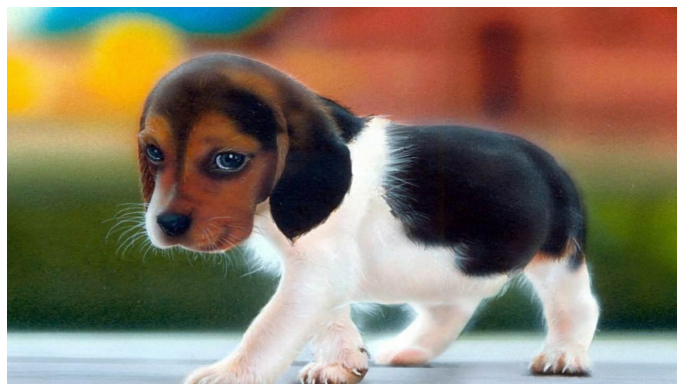

In [7]:
from matplotlib.image import imread
import numpy as np
import matplotlib.pyplot as plt
import os
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams.update({'font.size': 18})

#A = imread(os.path.join('..','DATA','dog.jpg'))
original_image=imread('dog_high_res.jpg')
plt.imshow(original_image)
plt.axis('off')

(-0.5, 1919.5, 1079.5, -0.5)

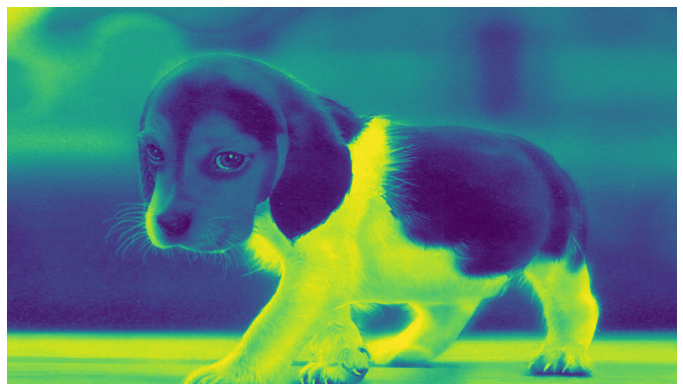

In [9]:
#convert to grayscale
gray_image=np.mean(original_image,-1)
plt.imshow(gray_image)
plt.axis('off')

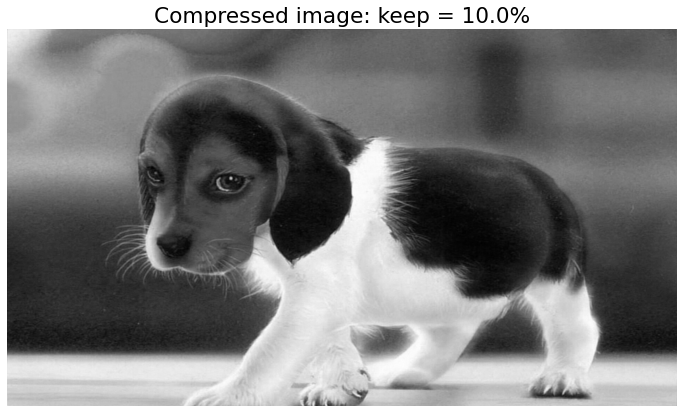

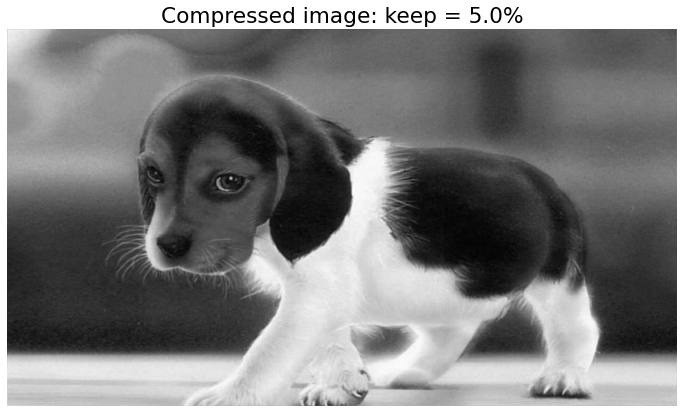

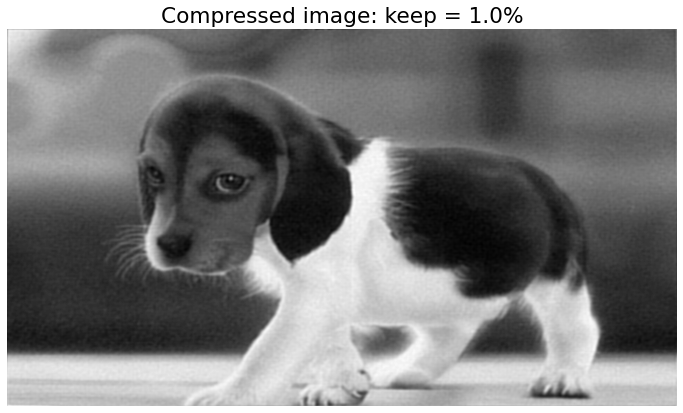

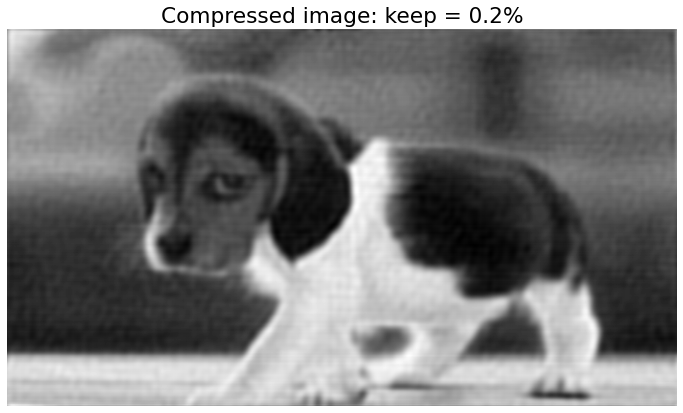

In [12]:
##perform fft2
fft_img=np.fft.fft2(gray_image)
fft_img_sort = np.sort(np.abs(fft_img.reshape(-1))) # sort by magnitude

# Zero out all small coefficients and inverse transform
for keep in (0.1, 0.05, 0.01, 0.002):
    thresh = fft_img_sort[int(np.floor((1-keep)*len(fft_img_sort)))]
    ind = np.abs(fft_img)>thresh          # Find small indices
    Atlow = fft_img * ind                 # Threshold small indices
    Alow = np.fft.ifft2(Atlow).real  # Compressed image
    plt.figure()
    plt.imshow(Alow,cmap='gray')
    plt.axis('off')
    plt.title('Compressed image: keep = ' + str(keep*100)+'%')